In [51]:
import numpy as np
import matplotlib.pyplot as plt
import wget
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [11]:
class FeatureSelector:
  def __init__(self, num_features):
    self.n = num_features # number of best features to select

  def fit(self, X, y):
    # Select features that describe the targets best, i.e. have
    # highest correlation with them:
    covariance = ((X - X.mean(axis=0)) * (y[:,np.newaxis] - y.mean())).mean(axis=0)
    self.best_feature_ids = np.argsort(np.abs(covariance))[-self.n:]

  def transform(self, X):
    return X[:,self.best_feature_ids]

  def fit_transform(self, X, y):
    self.fit(X, y)
    return self.transform(X)

In [33]:
num_features_total = 1000
num_features_best = 100

N = 100

# Dataset generation
X = np.random.normal(size=(N, num_features_total))
y = np.random.randint(2, size=N)

# Feature selection:
X_best = FeatureSelector(num_features_best).fit_transform(X, y)

# Simple classification model
model = LinearSVC()

# Estimatin accuracy using cross-validation:
cv_score = cross_val_score(model, X_best, y, scoring='accuracy', cv=10, n_jobs=-1).mean()
print(f"CV score is {cv_score}")

CV score is 0.9400000000000001


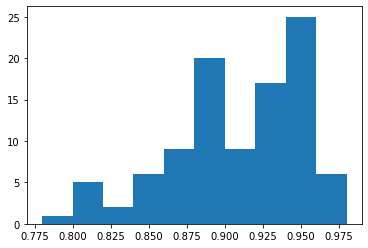

In [31]:
num_features_total = 1000
num_features_best = 100

N = 100
def experiment():
    # Dataset generation
    X = np.random.normal(size=(N, num_features_total))
    y = np.random.randint(2, size=N)
    
    # Feature selection:
    X_best = FeatureSelector(num_features_best).fit_transform(X, y)
    
    # Simple classification model
    model = LinearSVC()
    # Estimatin accuracy using cross-validation:
    return cross_val_score(model, X_best, y, scoring='accuracy', cv=10, n_jobs=-1).mean()

results = [experiment() for _ in range(100)]
plt.hist(results, bins=10);

## Task 1 (3 points)
I soppose that models were overfitting. There was a high level of prediction in specific data, but if i use a training and test sample, this situation is corrected

In [36]:
num_features_total = 1000
num_features_best = 100

N = 100

# Dataset generation
X = np.random.normal(size=(N, num_features_total))
y = np.random.randint(2, size=N)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=50, random_state=42)
# Feature selection:
X_best = FeatureSelector(num_features_best).fit_transform(X_test, y_test)

# Simple classification model
model = LinearSVC()

# Estimatin accuracy using cross-validation:
cv_score = cross_val_score(model, X_best, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean()
print(f"CV score is {cv_score}")

CV score is 0.45999999999999996


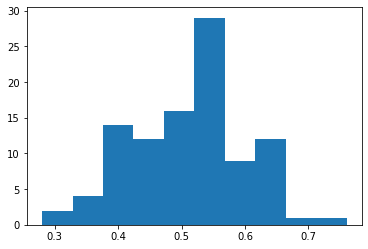

In [37]:
num_features_total = 1000
num_features_best = 100

N = 100
def experiment():
    # Dataset generation
    X = np.random.normal(size=(N, num_features_total))
    y = np.random.randint(2, size=N)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=50, random_state=42)
    # Feature selection:
    X_best = FeatureSelector(num_features_best).fit_transform(X_test, y_test)
    
    # Simple classification model
    model = LinearSVC()
    # Estimatin accuracy using cross-validation:
    return cross_val_score(model, X_best, y_train, scoring='accuracy', cv=10, n_jobs=-1).mean()

results = [experiment() for _ in range(100)]
plt.hist(results, bins=10);

## Task 2 (3 points)

In [139]:
wget.download('https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv', '/Users/spokr/OneDrive/Documents/GitHub/train.csv')

100% [..............................................................................] 60302 / 60302

'/Users/spokr/OneDrive/Documents/GitHub/train (1).csv'

In [140]:
data = pd.read_csv("train.csv", index_col='PassengerId')

Example on selected independent variables

In [141]:

def feature_selection_and_preprocessing(dataset):
    
  features = dataset[["Fare", "Sex"]].copy()
  features.Sex = features.Sex.replace(['male', 'female'],[1,0])
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    # <YOUR CODE>
    n_neighbors=6, weights = 'distance'
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.75


In [142]:
# split dependent variable and parameters
X_train = data[["Fare", "Sex"]].copy()
X_train.Sex = X_train.Sex.replace(['male', 'female'],[1,0])
X_train["Fare"] /= X_train["Fare"].mean()
X_train['Fare'] *= 1

y_train = data['Survived']

model = KNeighborsClassifier()

#dictionary for setting parameters
parametrs = { 'n_neighbors': range (1, 100, 5),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': range (1, 100, 10)}

grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'algorithm': 'auto', 'leaf_size': 11, 'n_neighbors': 6, 'weights': 'distance'}

In [144]:
def feature_selection_and_preprocessing(dataset):
    
  features = dataset[["Fare", "Sex"]].copy()
  features.Sex = features.Sex.replace(['male', 'female'],[1,0])
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    n_neighbors=6, algorithm='auto',leaf_size=11, weights = 'distance')


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.74


Example on all independent variables

In [145]:
#data preparation
data = data.drop('Name',  axis=1)
data = data.drop('Ticket',  axis=1)
data = data.drop('Cabin',  axis=1)
data.Sex = data.Sex.replace(['male', 'female'],[1,0])
data.Embarked = data["Embarked"].fillna(data["Embarked"].mode()[0])
data.Age.fillna(data["Age"].median(),inplace = True)
recode = {"Embarked":     {"S": 1, "C": 2,"Q":3}}
data = data.replace(recode)          
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1
2,1,1,0,38.0,1,0,71.2833,2
3,1,3,0,26.0,0,0,7.9250,1
4,1,1,0,35.0,1,0,53.1000,1
5,0,3,1,35.0,0,0,8.0500,1


In [146]:
# split dependent variable and parameters
X_train = data.drop('Survived', axis=1)
y_train = data['Survived']

model = KNeighborsClassifier()

#dictionary for setting parameters
parametrs = { 'n_neighbors': range (1, 30, 5),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': range (10, 50, 10)}

grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 26,
 'weights': 'distance'}

In [147]:
def feature_selection_and_preprocessing(dataset):
    features = dataset.copy()
    
    features = features.drop('Name',  axis=1)
    features = features.drop('Ticket',  axis=1)
    features = features.drop('Cabin',  axis=1)
    
    features.Sex = features.Sex.replace(['male', 'female'],[1,0])
    
    features.Embarked = features["Embarked"].fillna(features["Embarked"].mode()[0])
    recode = {"Embarked":     {"S": 1, "C": 2,"Q":3}}
    features = features.replace(recode)
    
    features.Age.fillna(features["Age"].median(),inplace = True)
    
    features["Fare"] /= features["Fare"].mean()
    features['Fare'] *= 1
    return features

model = KNeighborsClassifier(
    n_neighbors=26, algorithm='auto',leaf_size=10, weights = 'distance')


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.74
